In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import minmax_scale

## Reading Dataset

In [366]:
train_data = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/playground-series-s4e11/train.csv')
test_data = pd.read_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/playground-series-s4e11/test.csv')

In [367]:
train_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [368]:
test_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


## Data Preprocessing

# Work Pressure, Job Satisfaction columns are not applicable for students

# Academic Pressure, Study Satisfaction columns are not applicable for Working Professional

# Hence Merging Academic Pressure and Work Pressure into Pressure

# and Merging Study Satisfaction and Job Satisfaction into Satisfaction

In [369]:
train_data[['Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction']].head()

,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction
0,NaN,5.0,NaN,2.0
1,NaN,4.0,NaN,3.0
2,5.0,NaN,2.0,NaN
3,NaN,5.0,NaN,1.0
4,NaN,1.0,NaN,1.0


In [370]:
train_data['Pressure'] = train_data['Academic Pressure'].fillna(train_data['Work Pressure'])
test_data['Pressure'] = test_data['Academic Pressure'].fillna(test_data['Work Pressure'])

In [371]:
train_data['Satisfaction'] = train_data['Study Satisfaction'].fillna(train_data['Job Satisfaction'])
test_data['Satisfaction'] = test_data['Study Satisfaction'].fillna(test_data['Job Satisfaction'])

## As Merging is completed, dropping the columns 'Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction'

In [372]:
train_data = train_data.drop(columns = ['Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction'])
test_data = test_data.drop(columns = ['Academic Pressure','Work Pressure','Study Satisfaction','Job Satisfaction'])

In [373]:
train_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


## Impute Pressure and Satisfaction with Mean, as there are NaN values in these columns

In [374]:
train_data['Pressure'] = train_data['Pressure'].fillna(train_data['Pressure'].median())
test_data['Pressure'] = test_data['Pressure'].fillna(test_data['Pressure'].median())

In [375]:
test_data['Satisfaction'] = test_data['Satisfaction'].fillna(test_data['Satisfaction'].median())
train_data['Satisfaction'] = train_data['Satisfaction'].fillna(train_data['Satisfaction'].median())

In [376]:
train_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
CGPA                                     112802
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                      0
Satisfaction                                  0
dtype: int64

In [377]:
test_data.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
CGPA                                     75034
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Pressure                                     0
Satisfaction                                 0
dtype: int64

## Impute NaN values in Financial Stress with Median

In [378]:
train_data['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

In [379]:
train_data['Financial Stress'] = train_data['Financial Stress'].fillna(train_data['Financial Stress'].median())

In [380]:
test_data['Financial Stress'] = test_data['Financial Stress'].fillna(test_data['Financial Stress'].median())

## Professions counts which are less than 100 are merged to one - Others

In [381]:
train_data['Profession'].value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [382]:
Profession_counts = train_data['Profession'].value_counts()

In [383]:
rows_to_replace = Profession_counts[Profession_counts < 100].index

In [384]:
train_data['Profession'] = train_data['Profession'].apply(lambda x: 'Others' if x in rows_to_replace else x)

In [385]:
train_data['Profession'].value_counts()

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

In [386]:
test_profession_counts = test_data['Profession'].value_counts()

In [387]:
rows_to_replace = test_profession_counts[test_profession_counts < 100].index

In [388]:
test_data['Profession'] = test_data['Profession'].apply(lambda x: 'Others' if x in rows_to_replace else x)

In [389]:
test_data['Profession'].value_counts()

Profession
Teacher                   16385
Content Writer             5187
Architect                  2982
Consultant                 2920
Pharmacist                 2656
HR Manager                 2601
Doctor                     2198
Business Analyst           2186
Chemist                    1967
Entrepreneur               1935
Chef                       1844
Educational Consultant     1827
Data Scientist             1582
Lawyer                     1497
Researcher                 1496
Pilot                      1448
Customer Support           1422
Marketing Manager          1284
Judge                      1189
Travel Consultant          1188
Manager                    1155
Sales Executive            1139
Plumber                    1123
Electrician                1121
Financial Analyst          1048
Software Engineer          1002
Digital Marketer            942
Civil Engineer              938
UX/UI Designer              915
Finanancial Analyst         894
Accountant                  8

In [390]:
train_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
CGPA                                     112802
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
Pressure                                      0
Satisfaction                                  0
dtype: int64

In [391]:
train_data['Profession'].value_counts()

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

In [392]:
train_data[train_data['Profession'].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,5.90,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,2.0,5.0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,7.03,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,3.0,5.0
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0,1.0,5.0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,5.59,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140686,140686,Rohan,Male,27.0,Ludhiana,Student,NaN,9.40,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0,2.0,3.0
140689,140689,Ayaan,Male,31.0,Faridabad,Student,NaN,6.61,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0,3.0,4.0
140690,140690,Rashi,Female,18.0,Ludhiana,Student,NaN,6.88,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1,5.0,2.0
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,5.0,4.0


In [393]:
train_data.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
CGPA                                     float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
Pressure                                 float64
Satisfaction                             float64
dtype: object

In [394]:
train_data['Profession'].dtypes

dtype('O')

In [395]:
train_data['Profession'] = train_data['Working Professional or Student'].apply(lambda x: 'Student' if x == 'Student' else 'Working Professional')


In [396]:
train_data[train_data['Profession'].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction


In [397]:
train_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Working Professional,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Working Professional,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Working Professional,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Working Professional,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Working Professional,NaN,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,5.0,4.0
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Working Professional,NaN,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,5.0,4.0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Working Professional,NaN,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,3.0,1.0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Working Professional,NaN,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,5.0,2.0


In [398]:
test_data.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
CGPA                                     75034
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Pressure                                     0
Satisfaction                                 0
dtype: int64

In [399]:
test_data['Profession'] = test_data['Working Professional or Student'].apply(lambda x: 'Student' if x == 'Student' else x)

In [400]:
test_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Working Professional,NaN,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,2.0,5.0
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Working Professional,NaN,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,2.0,4.0
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Working Professional,NaN,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,4.0,1.0
3,140703,Nalini,Female,23.0,Rajkot,Student,Student,6.84,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,5.0,1.0
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Working Professional,NaN,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Working Professional,NaN,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,3.0,5.0
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Working Professional,NaN,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,5.0,1.0
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,Student,7.51,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,1.0,4.0
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Working Professional,NaN,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,4.0,2.0


In [401]:
train_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
CGPA                                     112802
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
Pressure                                      0
Satisfaction                                  0
dtype: int64

In [402]:
test_data.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
CGPA                                     75034
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Pressure                                     0
Satisfaction                                 0
dtype: int64

In [403]:
train_data['CGPA'] = train_data['CGPA'].median()

In [404]:
test_data['CGPA'] = test_data['CGPA'].median()

In [405]:
train_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           4
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
dtype: int64

In [406]:
test_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           5
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Pressure                                 0
Satisfaction                             0
dtype: int64

## Cities value counts which are less than 100 are merged to one - Others

In [407]:
City_counts = train_data['City'].value_counts()

In [408]:
rows_to_replace = City_counts[City_counts < 100].index

In [409]:
train_data['City'] = train_data['City'].apply(lambda x: 'Others' if x in rows_to_replace else x)

In [410]:
train_data['City'].value_counts()

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Others             98
Name: count, dtype: int64

In [411]:
City_counts = test_data['City'].value_counts()

In [412]:
rows_to_replace = City_counts[City_counts < 100].index

In [413]:
test_data['City'] = test_data['City'].apply(lambda x: 'Others' if x in rows_to_replace else x)

In [414]:
train_data['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [415]:
sleep_duration_map = {
     "More than 8 hours":9,
        'Less than 5 hours':4,
        '5-6 hours':5.5,
        '7-8 hours':7.5,
        '1-2 hours':1.5,
        '6-8 hours':7,
        '4-6 hours':5,
        '6-7 hours':6.5,
        '10-11 hours':10.5,
        '8-9 hours':8.5,
        '9-11 hours':10,
        '2-3 hours':2.5,
        '3-4 hours':3.5,
        'Moderate':6,
        '4-5 hours':4.5,
        '9-6 hours':7.5,
        '1-3 hours':2,
        '1-6 hours':4,
        '8 hours':8,
        '10-6 hours':8,
        'Unhealthy':3,
        'Work_Study_Hours':6,
        '3-6 hours':3.5,
        '9-5':7,
        '9-5 hours':7
}

In [416]:
train_data['Sleep Duration'] = train_data['Sleep Duration'].map(sleep_duration_map).fillna(np.nan)

In [417]:
test_data['Sleep Duration'] = test_data['Sleep Duration'].map(sleep_duration_map).fillna(np.nan)

In [418]:
train_data.isna().sum()

id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                           16
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
Pressure                                  0
Satisfaction                              0
dtype: int64

In [419]:
train_data[train_data['Sleep Duration'].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
4021,4021,Keshav,Male,59.0,Ghaziabad,Working Professional,Working Professional,7.77,NaN,Healthy,LLB,Yes,10.0,1.0,No,0,4.0,4.0
19915,19915,Zara,Female,27.0,Ludhiana,Student,Student,7.77,NaN,Healthy,M.Tech,Yes,8.0,5.0,Yes,1,4.0,5.0
29050,29050,Sanjeev,Male,23.0,Mumbai,Student,Student,7.77,NaN,Moderate,BE,Yes,12.0,4.0,Yes,1,5.0,4.0
35953,35953,Aarav,Male,34.0,Thane,Working Professional,Working Professional,7.77,NaN,Moderate,MCA,Yes,9.0,3.0,Yes,0,3.0,3.0
45218,45218,Anjali,Female,44.0,Meerut,Working Professional,Working Professional,7.77,NaN,Moderate,MD,No,6.0,4.0,Yes,0,2.0,2.0
50817,50817,Utkarsh,Male,41.0,Faridabad,Working Professional,Working Professional,7.77,NaN,Moderate,MD,No,8.0,5.0,No,0,4.0,4.0
61185,61185,Arnav,Male,38.0,Thane,Working Professional,Working Professional,7.77,NaN,Moderate,BSc,Yes,5.0,5.0,No,0,2.0,1.0
66929,66929,Damini,Female,54.0,Bhopal,Working Professional,Working Professional,7.77,NaN,Healthy,MBBS,No,5.0,1.0,No,0,3.0,1.0
68239,68239,Zegmay,Male,46.0,Bhopal,Working Professional,Working Professional,7.77,NaN,Unhealthy,MCA,No,3.0,1.0,Yes,0,5.0,3.0
72700,72700,Aaradhya,Female,33.0,Ahmedabad,Student,Student,7.77,NaN,Moderate,PhD,No,10.0,2.0,Yes,0,4.0,4.0


In [420]:
train_data['Sleep Duration'] = train_data['Sleep Duration'].fillna(train_data['Sleep Duration'].median())

In [421]:
test_data.isna().sum()

id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                           12
Dietary Habits                            5
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Pressure                                  0
Satisfaction                              0
dtype: int64

In [422]:
test_data['Sleep Duration'] = test_data['Sleep Duration'].fillna(test_data['Sleep Duration'].median())

In [423]:
test_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           5
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Pressure                                 0
Satisfaction                             0
dtype: int64

In [424]:
degree = {
    "BCom": "B.Com", "B.Com": "B.Com", "B.Comm": "B.Com",
    "B.Tech": "B.Tech", "BTech": "B.Tech", "B.T": "B.Tech",
    "BSc": "B.Sc", "B.Sc": "B.Sc", "Bachelor of Science": "B.Sc",
    "BArch": "B.Arch", "B.Arch": "B.Arch",
    "BA": "B.A", "B.A": "B.A",
    "BBA": "BBA", "BB": "BBA",
    "BCA": "BCA",
    "BE": "BE",
    "BEd": "B.Ed", "B.Ed": "B.Ed",
    "BPharm": "B.Pharm", "B.Pharm": "B.Pharm",
    "BHM": "BHM",
    "LLB": "LLB", "LL B": "LLB", "LL BA": "LLB", "LL.Com": "LLB", "LLCom": "LLB",
    "MCom": "M.Com", "M.Com": "M.Com",
    "M.Tech": "M.Tech", "MTech": "M.Tech", "M.T": "M.Tech",
    "MSc": "M.Sc", "M.Sc": "M.Sc", "Master of Science": "M.Sc",
    "MBA": "MBA",
    "MCA": "MCA",
    "MD": "MD",
    "ME": "ME",
    "MEd": "M.Ed", "M.Ed": "M.Ed",
    "MArch": "M.Arch", "M.Arch": "M.Arch",
    "MPharm": "M.Pharm", "M.Pharm": "M.Pharm",
    "MA": "MA", "M.A": "MA",
    "MPA": "MPA",
    "LLM": "LLM",
    "PhD": "PhD",
    "MBBS": "MBBS",
    "CA": "CA",
    "Class 12": "Class 12", "12th": "Class 12",
    "Class 11": "Class 11", "11th": "Class 11"
}

In [425]:
train_data['Degree'] = train_data['Degree'].map(degree).fillna(train_data['Degree'].mode()[0])
test_data['Degree'] = test_data['Degree'].map(degree).fillna(test_data['Degree'].mode()[0])

In [426]:
train_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           4
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
dtype: int64

In [427]:
train_data['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [428]:
diet={
    'More Healty':0,
    'Healthy':1,
    'Less than Healthy':2,
    'Less Healthy':2,
    'Moderate':3,
    'Unhealthy':4,   
    'No Healthy':4,
}

In [429]:
train_data['Dietary Habits'] = train_data['Dietary Habits'].map(diet).fillna(4)

In [430]:
test_data['Dietary Habits'] = test_data['Dietary Habits'].map(diet).fillna(4)

In [431]:
train_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
dtype: int64

In [432]:
test_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Pressure                                 0
Satisfaction                             0
dtype: int64

## EDA

In [433]:
train_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Working Professional,7.77,9.0,1.0,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Working Professional,7.77,4.0,4.0,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,7.77,5.5,1.0,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Working Professional,7.77,4.0,3.0,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Working Professional,7.77,5.5,4.0,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Working Professional,7.77,5.5,4.0,Class 12,No,2.0,4.0,Yes,1,5.0,4.0
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Working Professional,7.77,7.5,3.0,B.Tech,Yes,6.0,5.0,Yes,0,5.0,4.0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Working Professional,7.77,9.0,3.0,B.Com,No,4.0,4.0,No,0,3.0,1.0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Working Professional,7.77,5.5,3.0,ME,Yes,10.0,1.0,No,0,5.0,2.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

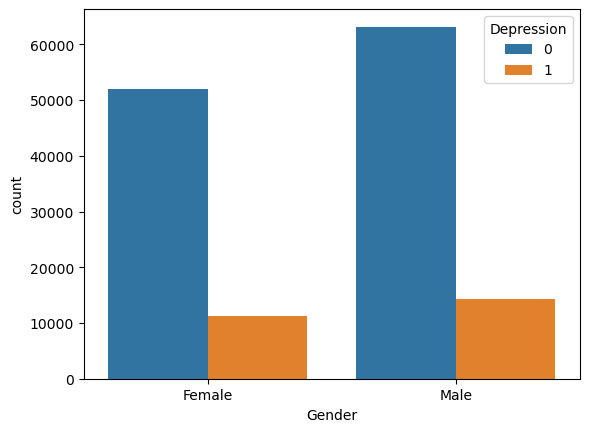

In [434]:
sns.countplot(x='Gender',data=train_data,hue='Depression')

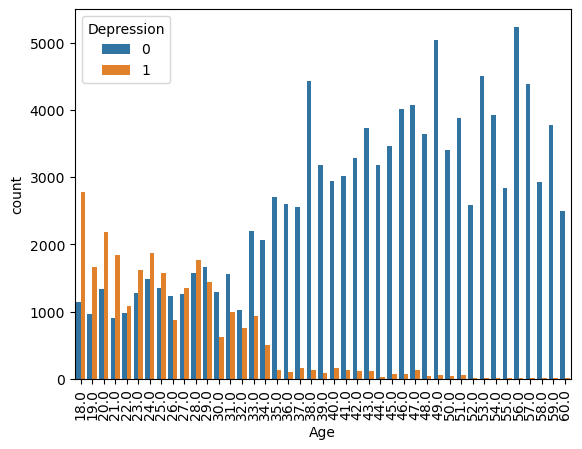

In [435]:
sns.countplot(x='Age',data=train_data,hue='Depression')
plt.xticks(rotation=90)
plt.show()

## Observation: Depressed people are in between age 18 to 33
    
## feature to consider: Age

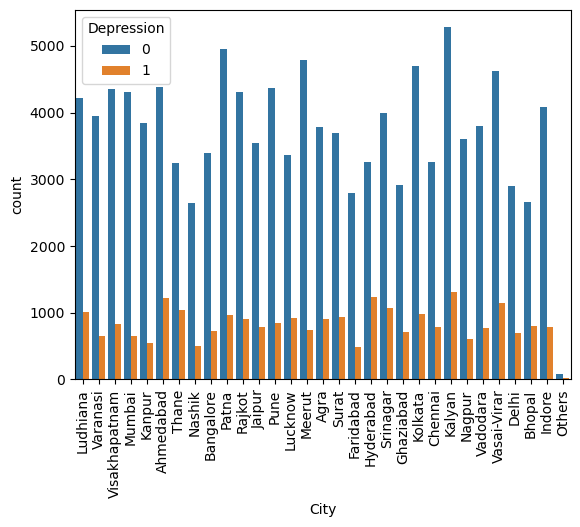

In [436]:
sns.countplot(x='City',data=train_data,hue='Depression')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Profession', ylabel='count'>

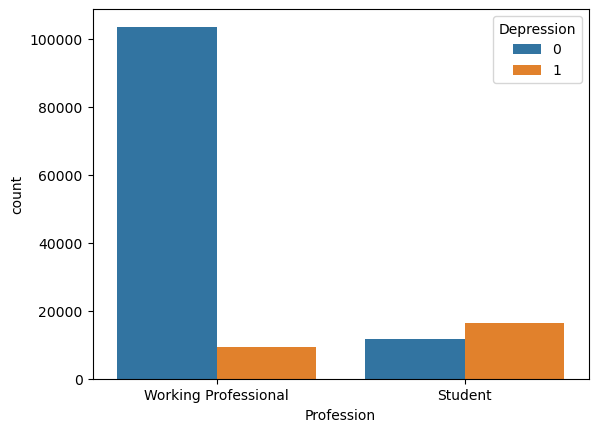

In [437]:
sns.countplot(x='Profession',data=train_data,hue='Depression')

<AxesSubplot:xlabel='Sleep Duration', ylabel='count'>

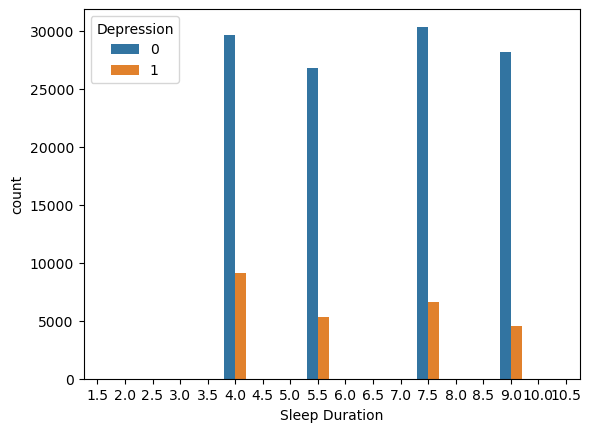

In [438]:
sns.countplot(x='Sleep Duration',data=train_data,hue='Depression')

## Observation: Depressed people are sleeping for 4 hours to 9 hours
    
## feature to consider Sleep Duration

<AxesSubplot:xlabel='Dietary Habits', ylabel='count'>

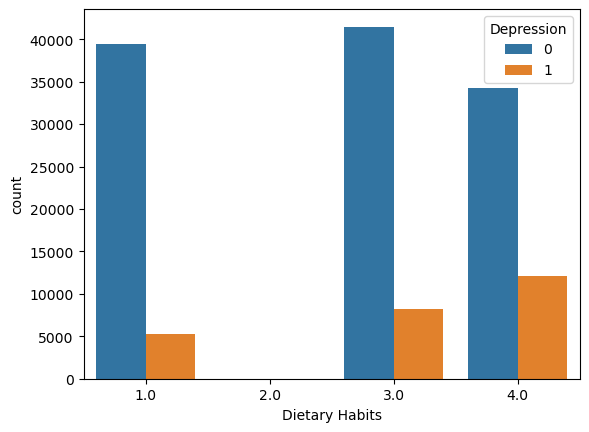

In [439]:
sns.countplot(x='Dietary Habits',data=train_data,hue='Depression')

## Observation: Most Depression people are with unhealthy diet

In [440]:
train_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Working Professional,7.77,9.0,1.0,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Working Professional,7.77,4.0,4.0,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,7.77,5.5,1.0,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Working Professional,7.77,4.0,3.0,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Working Professional,7.77,5.5,4.0,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Working Professional,7.77,5.5,4.0,Class 12,No,2.0,4.0,Yes,1,5.0,4.0
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Working Professional,7.77,7.5,3.0,B.Tech,Yes,6.0,5.0,Yes,0,5.0,4.0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Working Professional,7.77,9.0,3.0,B.Com,No,4.0,4.0,No,0,3.0,1.0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Working Professional,7.77,5.5,3.0,ME,Yes,10.0,1.0,No,0,5.0,2.0


In [441]:
train_data['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

<AxesSubplot:xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

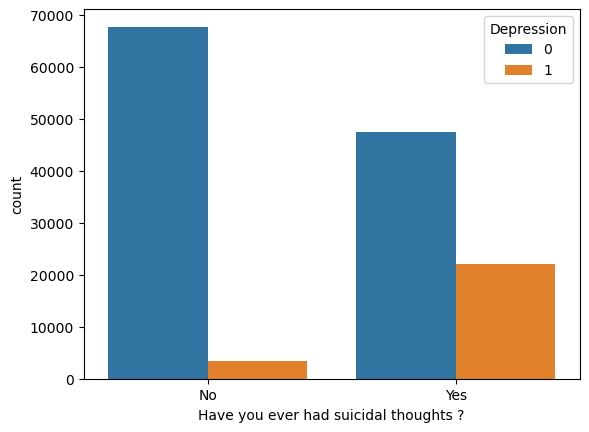

In [442]:
sns.countplot(x='Have you ever had suicidal thoughts ?',data=train_data,hue='Depression')

## Observation: People with suicidal thoughts are in depression
    
## feature to consider: Have you ever had suicidal thoughts ?

<AxesSubplot:xlabel='Work/Study Hours', ylabel='count'>

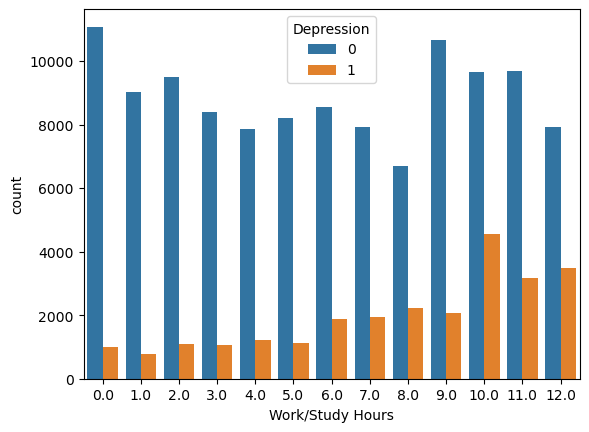

In [443]:
sns.countplot(x='Work/Study Hours',data=train_data,hue='Depression')

## Observation: as work/study hours are increasing, depression is increasing
    
## feature to consider: Work/Study Hours

<AxesSubplot:xlabel='Financial Stress', ylabel='count'>

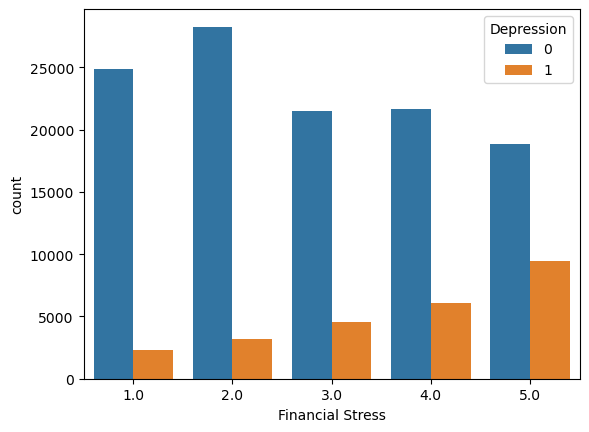

In [444]:
sns.countplot(x='Financial Stress',data=train_data,hue='Depression')

## Observation: As Financial stress incresing, Depression also increasing

## feature to consider: 'Financial Stress'

<AxesSubplot:xlabel='Family History of Mental Illness', ylabel='count'>

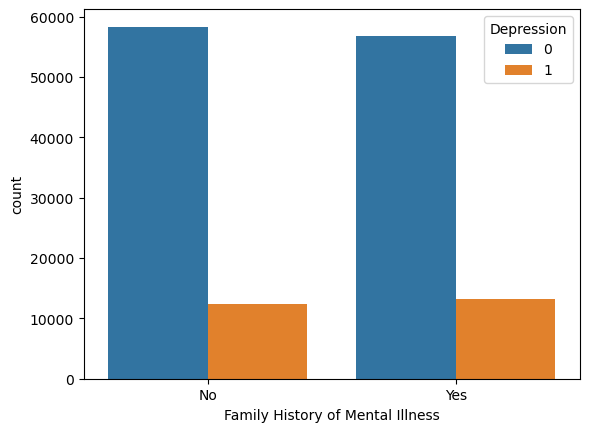

In [445]:
sns.countplot(x='Family History of Mental Illness',data=train_data,hue='Depression')

<AxesSubplot:xlabel='Pressure', ylabel='count'>

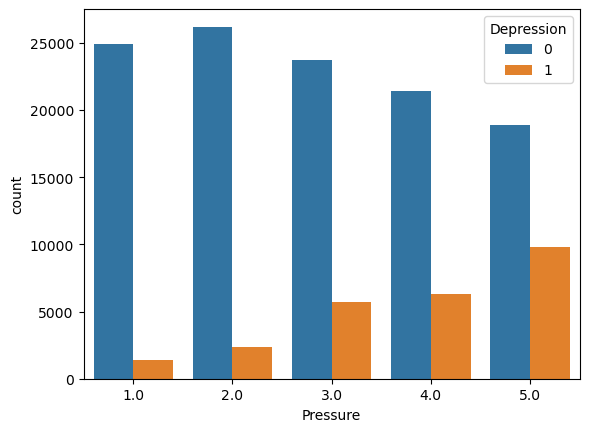

In [446]:
sns.countplot(x='Pressure',data=train_data,hue='Depression')

## Observation: As the pressure is increasing, depression is also incresing
    
## feature to consider: Pressure

<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

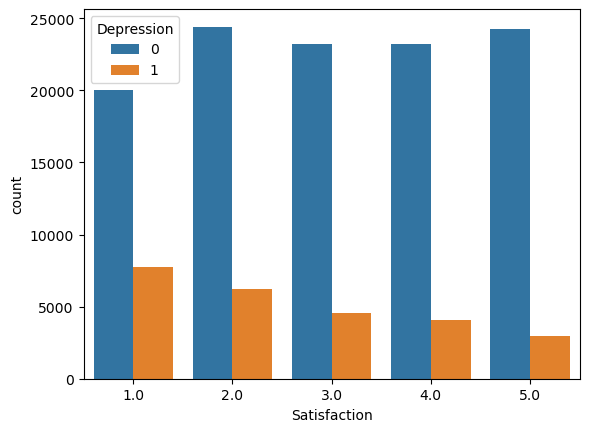

In [447]:
sns.countplot(x='Satisfaction',data=train_data,hue='Depression')

## Observation: When there is less satisfaction, there is more depression
    
## feature to consider: Satisfaction

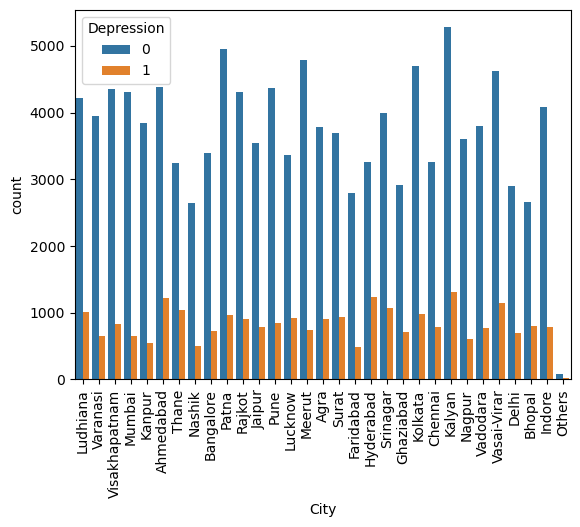

In [448]:
sns.countplot(x='City',data=train_data,hue='Depression')
plt.xticks(rotation=90)
plt.show()

## Model Training

In [449]:
X = train_data[['Satisfaction','Pressure','Financial Stress','Have you ever had suicidal thoughts ?','Dietary Habits','Sleep Duration','Age']]

y = train_data['Depression']

In [450]:
X

,Satisfaction,Pressure,Financial Stress,Have you ever had suicidal thoughts ?,Dietary Habits,Sleep Duration,Age
0,2.0,5.0,2.0,No,1.0,9.0,49.0
1,3.0,4.0,3.0,Yes,4.0,4.0,26.0
2,2.0,5.0,1.0,Yes,1.0,5.5,33.0
3,1.0,5.0,1.0,Yes,3.0,4.0,22.0
4,1.0,1.0,4.0,Yes,4.0,5.5,30.0
...,...,...,...,...,...,...,...
140695,4.0,5.0,4.0,No,4.0,5.5,18.0
140696,4.0,5.0,5.0,Yes,3.0,7.5,41.0
140697,1.0,3.0,4.0,No,3.0,9.0,24.0
140698,2.0,5.0,1.0,Yes,3.0,5.5,49.0


In [451]:
map_thoughts = {
    "No": 0,
    "Yes" : 1
}

In [452]:
train_data['Have you ever had suicidal thoughts ?'] = train_data['Have you ever had suicidal thoughts ?'].map(map_thoughts)

In [454]:
X = train_data[['Satisfaction','Pressure','Financial Stress','Have you ever had suicidal thoughts ?','Dietary Habits','Sleep Duration','Age']]

y = train_data['Depression']

In [455]:
X

,Satisfaction,Pressure,Financial Stress,Have you ever had suicidal thoughts ?,Dietary Habits,Sleep Duration,Age
0,2.0,5.0,2.0,0,1.0,9.0,49.0
1,3.0,4.0,3.0,1,4.0,4.0,26.0
2,2.0,5.0,1.0,1,1.0,5.5,33.0
3,1.0,5.0,1.0,1,3.0,4.0,22.0
4,1.0,1.0,4.0,1,4.0,5.5,30.0
...,...,...,...,...,...,...,...
140695,4.0,5.0,4.0,0,4.0,5.5,18.0
140696,4.0,5.0,5.0,1,3.0,7.5,41.0
140697,1.0,3.0,4.0,0,3.0,9.0,24.0
140698,2.0,5.0,1.0,1,3.0,5.5,49.0


In [456]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=1000)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((139700, 7), (1000, 7), (139700,), (1000,))

## Decision Tree

In [457]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=7,max_leaf_nodes=30)

In [458]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.923

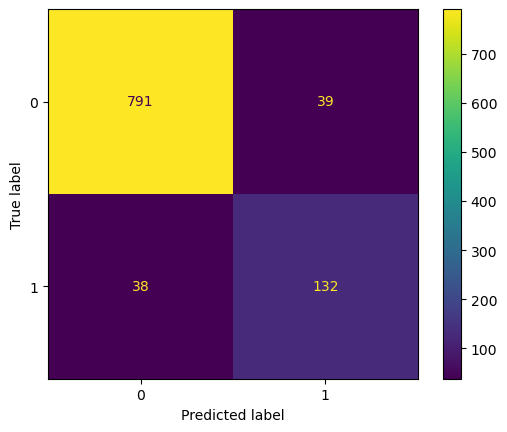

In [459]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

## K-Nearest Neighbors

## Using minmax scaling to scale the features

In [460]:
X_scaled = minmax_scale(X)

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=10,test_size=1000)

In [462]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [463]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.918

/Users/navyatrilok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


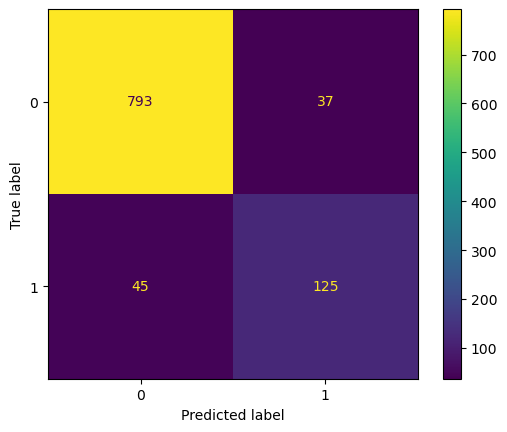

In [464]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test)

In [465]:
model.feature_importances_

array([0.01068423, 0.07649559, 0.04267838, 0.19180162, 0.00458482,
       0.        , 0.67375536])

## Looking at feature importances, Sleep Duration and Dietary habits has less importance, hence removing them from feature list

In [466]:
X = train_data[['Satisfaction','Pressure','Financial Stress','Have you ever had suicidal thoughts ?','Age']]

y = train_data['Depression']

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=1000) 

In [468]:
X_train

,Satisfaction,Pressure,Financial Stress,Have you ever had suicidal thoughts ?,Age
79488,4.0,3.0,4.0,0,21.0
32647,1.0,4.0,3.0,1,43.0
58804,5.0,5.0,2.0,1,38.0
102861,2.0,1.0,1.0,1,28.0
118433,3.0,2.0,2.0,0,34.0
...,...,...,...,...,...
9372,1.0,5.0,4.0,1,21.0
105595,4.0,3.0,1.0,1,28.0
93553,4.0,4.0,5.0,0,53.0
94735,4.0,4.0,2.0,0,47.0


In [469]:
model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=7,max_leaf_nodes=30)
model_dt.fit(X_train,y_train)
model_dt.score(X_test,y_test)

0.923

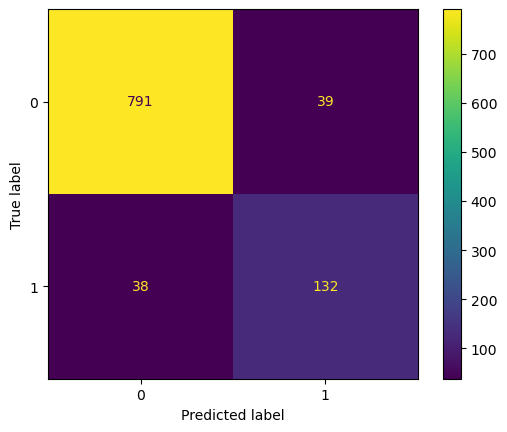

In [470]:
ConfusionMatrixDisplay.from_estimator(model_dt,X_test,y_test)

In [471]:
X_scaled = minmax_scale(X)

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=10,test_size=1000)


In [473]:
knn = KNeighborsClassifier(n_neighbors = 9,weights='distance',p=2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.92

## Predictions on Test Data and Storing the results in CSV File for Submission

In [474]:
test_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Working Professional,7.8,4.0,3.0,LLB,No,9.0,3.0,Yes,2.0,5.0
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Working Professional,7.8,4.0,3.0,B.Ed,No,6.0,4.0,No,2.0,4.0
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Working Professional,7.8,7.5,3.0,B.Arch,Yes,12.0,4.0,No,4.0,1.0
3,140703,Nalini,Female,23.0,Rajkot,Student,Student,7.8,9.0,3.0,B.Sc,Yes,10.0,4.0,No,5.0,1.0
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Working Professional,7.8,7.5,3.0,BCA,Yes,3.0,4.0,No,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Working Professional,7.8,4.0,3.0,B.Sc,Yes,2.0,2.0,Yes,3.0,5.0
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Working Professional,7.8,7.5,3.0,BE,Yes,11.0,3.0,Yes,5.0,1.0
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,Student,7.8,7.5,3.0,B.Tech,No,7.0,1.0,No,1.0,4.0
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Working Professional,7.8,5.5,1.0,B.A,Yes,7.0,5.0,Yes,4.0,2.0


In [475]:
input_test_data = test_data[['Satisfaction','Pressure','Financial Stress','Have you ever had suicidal thoughts ?','Age']]

In [476]:
input_test_data

,Satisfaction,Pressure,Financial Stress,Have you ever had suicidal thoughts ?,Age
0,5.0,2.0,3.0,No,53.0
1,4.0,2.0,4.0,No,58.0
2,1.0,4.0,4.0,Yes,53.0
3,1.0,5.0,4.0,Yes,23.0
4,5.0,5.0,4.0,Yes,47.0
...,...,...,...,...,...
93795,5.0,3.0,2.0,Yes,49.0
93796,1.0,5.0,3.0,Yes,29.0
93797,4.0,1.0,1.0,No,24.0
93798,2.0,4.0,5.0,Yes,23.0


In [477]:
map_thoughts = {
    "No": 0,
    "Yes" : 1
}

In [478]:
input_test_data['Have you ever had suicidal thoughts ?'] = input_test_data['Have you ever had suicidal thoughts ?'].map(map_thoughts)

/var/folders/mq/lgb2zhss60n1z1v70wsrf4ww0000gn/T/ipykernel_10135/3373826408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_test_data['Have you ever had suicidal thoughts ?'] = input_test_data['Have you ever had suicidal thoughts ?'].map(map_thoughts)


In [479]:
test_data_predictions = model_dt.predict(input_test_data)

In [480]:
result_df = pd.DataFrame({
    'id': test_data['id'],  # Extract IDs from the original DataFrame
    'Depression': test_data_predictions
})

# Save to Excel
result_df.to_csv('/Users/navyatrilok/Documents/DATASCIENCE/Kaggle/playground-series-s4e11/submission3.csv', index=False)
